In [ ]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 117.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.


In [ ]:
!pip install --upgrade torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Step 3: Download and Prepare Dataset
import zipfile
import os

os.makedirs('data/aflw2000/images', exist_ok=True)
os.makedirs('data/aflw2000/meshes', exist_ok=True)

# Change to your actual path

drive_zip_path = '/content/drive/MyDrive/CS Courses/Research/research code/AFLW2000-3D.zip'
extract_path = 'data/aflw2000'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(drive_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# Paths
src_img_dir = "/content/data/aflw2000/images"
src_mesh_dir = "/content/data/aflw2000/meshes"

dst_img_dir = "/content/data_subset/images"
dst_mesh_dir = "/content/data_subset/meshes"

# Create output directories
os.makedirs(dst_img_dir, exist_ok=True)
os.makedirs(dst_mesh_dir, exist_ok=True)

In [ ]:
# Check available files in the extracted folder
extracted_path = '/content/data/aflw2000/AFLW2000'
all_files = os.listdir(extracted_path)

# Separate image and mesh files
image_files = sorted([f for f in all_files if f.endswith('.jpg')])
mesh_files = sorted([f for f in all_files if f.endswith('.mat')])

print(f"Total images: {len(image_files)}, Total meshes: {len(mesh_files)}")

Total images: 2000, Total meshes: 2000


In [ ]:
import os
import shutil
import random

NUM_SAMPLES = 2000

In [ ]:
# Ensure matching image-mesh pairs exist
paired_ids = [f.split('.')[0] for f in image_files if f.replace('.jpg', '.mat') in mesh_files]

img_out_dir = '/content/data/aflw2000/images'
mesh_out_dir = '/content/data/aflw2000/meshes'

os.makedirs(img_out_dir, exist_ok=True)
os.makedirs(mesh_out_dir, exist_ok=True)

sample_ids = random.sample(paired_ids, min(NUM_SAMPLES, len(paired_ids)))

# Copy all pairs
for sid in sample_ids:
    shutil.copy(os.path.join(extracted_path, f'{sid}.jpg'), os.path.join(img_out_dir, f'{sid}.jpg'))
    shutil.copy(os.path.join(extracted_path, f'{sid}.mat'), os.path.join(mesh_out_dir, f'{sid}.mat'))

print(f" Extracted and copied {len(sample_ids)} image-mesh pairs.")

 Extracted and copied 2000 image-mesh pairs.


In [ ]:
# Number of samples to select
NUM_SAMPLES = 20  # Change this as needed

# Subset Output directories
subset_img_out_dir = '/content/data_subset/images'
subset_mesh_out_dir = '/content/data_subset/meshes'
os.makedirs(subset_img_out_dir, exist_ok=True)
os.makedirs(subset_mesh_out_dir, exist_ok=True)

sample_ids = random.sample(paired_ids, min(NUM_SAMPLES, len(paired_ids)))

# Copy selected pairs
for sid in sample_ids:
    shutil.copy(os.path.join(extracted_path, f'{sid}.jpg'), os.path.join(subset_img_out_dir, f'{sid}.jpg'))
    shutil.copy(os.path.join(extracted_path, f'{sid}.mat'), os.path.join(subset_mesh_out_dir, f'{sid}.mat'))

print(f" Extracted and copied {len(sample_ids)} image-mesh pairs.")

 Extracted and copied 20 image-mesh pairs.


In [ ]:
!pip install mediapipe

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.


In [ ]:
# Masked Face Reconstruction with DINOv2 using AFLW2000-3D and MediaPipe

"""
This script sets up an end-to-end pipeline for masked face reconstruction experiments using DINOv2.
It performs the following:
1. Downloads and prepares the AFLW2000-3D dataset
2. Applies synthetic face masks using MediaPipe
3. Uses nearest-neighbor retrieval via DINOv2 features to simulate reconstruction

"""

import os
import random
import shutil
import subprocess
import torch
from PIL import Image
from tqdm import tqdm
import torch.nn.functional as F
from torchvision import transforms
from torchvision.models import vit_b_16
import cv2
import numpy as np
import mediapipe as mp

# Setup directories
src_img_dir = '/content/data/aflw2000/images'
src_mat_dir = '/content/data/aflw2000/meshes'
dest_img_dir = '/content/data_subset/images'
dest_mat_dir = '/content/data_subset/meshes'
masked_img_dir = '/content/masked_faces'

os.makedirs(dest_img_dir, exist_ok=True)
os.makedirs(dest_mat_dir, exist_ok=True)
os.makedirs(masked_img_dir, exist_ok=True)

# STEP 3: Randomly sample 20 face images
image_files = sorted([f for f in os.listdir(src_img_dir) if f.endswith('.jpg')])
sampled_files = random.sample(image_files, min(20, len(image_files)))

for fname in sampled_files:
    shutil.copy(os.path.join(src_img_dir, fname), dest_img_dir)
    mat_name = fname.replace('.jpg', '.mat')
    src_mat_path = os.path.join(src_mat_dir, mat_name)
    if os.path.exists(src_mat_path):
        shutil.copy(src_mat_path, dest_mat_dir)
    else:
        print(f"Warning: MAT file not found for {fname}")

# Generate masked faces using MediaPipe
mp_face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True)

def apply_mask_mediapipe(img_path, out_path):
    img = cv2.imread(img_path)
    results = mp_face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks:
        h, w, _ = img.shape
        for landmarks in results.multi_face_landmarks:
            mask_points = np.array([
                [int(lm.x * w), int(lm.y * h)]
                for i, lm in enumerate(landmarks.landmark)
                if i in range(0, 468) and lm.y * h > h * 0.55
            ])
            if mask_points.shape[0] > 0:
                cv2.fillPoly(img, [mask_points], color=(0, 0, 0))
    cv2.imwrite(out_path, img)

for fname in sampled_files:
    in_path = os.path.join(dest_img_dir, fname)
    out_path = os.path.join(masked_img_dir, fname)
    apply_mask_mediapipe(in_path, out_path)

print("\nMasked face images generated in: ./masked_faces")

# Reconstruct via DINOv2 Nearest Neighbor Retrieval
masked_paths = sorted([os.path.join(masked_img_dir, f) for f in os.listdir(masked_img_dir) if f.endswith('.jpg')])
reference_paths = sorted([os.path.join(dest_img_dir, f) for f in os.listdir(dest_img_dir) if f.endswith('.jpg')])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = vit_b_16(pretrained=True).eval().to(device)

def extract_embeddings(image_paths):
    feats = []
    for path in tqdm(image_paths):
        img = transform(Image.open(path).convert('RGB')).unsqueeze(0).to(device)
        with torch.no_grad():
            feat = model(img).squeeze(0).cpu()
        feats.append(feat)
    return torch.stack(feats)

masked_feats = extract_embeddings(masked_paths)
reference_feats = extract_embeddings(reference_paths)

reconstructed_paths = []
for feat in tqdm(masked_feats):
    sim = F.cosine_similarity(feat.unsqueeze(0), reference_feats)
    best_idx = torch.argmax(sim).item()
    reconstructed_paths.append(reference_paths[best_idx])

print("\nNearest-neighbor reconstructed image paths:")
for i, rec in enumerate(reconstructed_paths):
    print(f"{os.path.basename(masked_paths[i])} -> {os.path.basename(rec)}")

# Generate masked faces using MediaPipe
mp_face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True)

def apply_mask_mediapipe(img_path, out_path):
    img = cv2.imread(img_path)
    results = mp_face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks:
        h, w, _ = img.shape
        for landmarks in results.multi_face_landmarks:
            mask_points = np.array([
                [int(lm.x * w), int(lm.y * h)]
                for i, lm in enumerate(landmarks.landmark)
                if i in range(0, 468) and lm.y * h > h * 0.55
            ])
            if mask_points.shape[0] > 0:
                cv2.fillPoly(img, [mask_points], color=(0, 0, 0))
    cv2.imwrite(out_path, img)

for fname in sampled_files:
    in_path = os.path.join(dest_img_dir, fname)
    out_path = os.path.join(masked_img_dir, fname)
    apply_mask_mediapipe(in_path, out_path)

print("\nMasked face images generated in: ./masked_faces")

# Reconstruct via DINOv2 Nearest Neighbor Retrieval
masked_paths = sorted([os.path.join(masked_img_dir, f) for f in os.listdir(masked_img_dir) if f.endswith('.jpg')])
reference_paths = sorted([os.path.join(dest_img_dir, f) for f in os.listdir(dest_img_dir) if f.endswith('.jpg')])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = vit_b_16(pretrained=True).eval().to(device)

def extract_embeddings(image_paths):
    feats = []
    for path in tqdm(image_paths):
        img = transform(Image.open(path).convert('RGB')).unsqueeze(0).to(device)
        with torch.no_grad():
            feat = model(img).squeeze(0).cpu()
        feats.append(feat)
    return torch.stack(feats)

masked_feats = extract_embeddings(masked_paths)
reference_feats = extract_embeddings(reference_paths)

reconstructed_paths = []
for feat in tqdm(masked_feats):
    sim = F.cosine_similarity(feat.unsqueeze(0), reference_feats)
    best_idx = torch.argmax(sim).item()
    reconstructed_paths.append(reference_paths[best_idx])

print("\nNearest-neighbor reconstructed image paths:")
for i, rec in enumerate(reconstructed_paths):
    print(f"{os.path.basename(masked_paths[i])} -> {os.path.basename(rec)}")


Masked face images generated in: ./masked_faces


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


100%|██████████| 330M/330M [00:01<00:00, 232MB/s]
100%|██████████| 20/20 [00:00<00:00, 6788.00it/s]



Nearest-neighbor reconstructed image paths:
image00036.jpg -> image00036.jpg
image00167.jpg -> image01986.jpg
image00329.jpg -> image00329.jpg
image00387.jpg -> image00387.jpg
image00935.jpg -> image00935.jpg
image01466.jpg -> image01466.jpg
image01828.jpg -> image01828.jpg
image02152.jpg -> image02152.jpg
image02178.jpg -> image02178.jpg
image02283.jpg -> image02283.jpg
image02598.jpg -> image02598.jpg
image02775.jpg -> image02775.jpg
image02804.jpg -> image02804.jpg
image02818.jpg -> image02818.jpg
image02866.jpg -> image02866.jpg
image02980.jpg -> image02980.jpg
image02992.jpg -> image02992.jpg
image03214.jpg -> image03214.jpg
image03652.jpg -> image03652.jpg
image03726.jpg -> image03726.jpg

Masked face images generated in: ./masked_faces


100%|██████████| 20/20 [00:00<00:00, 7105.38it/s]


Nearest-neighbor reconstructed image paths:
image00036.jpg -> image00036.jpg
image00167.jpg -> image01986.jpg
image00329.jpg -> image00329.jpg
image00387.jpg -> image00387.jpg
image00935.jpg -> image00935.jpg
image01466.jpg -> image01466.jpg
image01828.jpg -> image01828.jpg
image02152.jpg -> image02152.jpg
image02178.jpg -> image02178.jpg
image02283.jpg -> image02283.jpg
image02598.jpg -> image02598.jpg
image02775.jpg -> image02775.jpg
image02804.jpg -> image02804.jpg
image02818.jpg -> image02818.jpg
image02866.jpg -> image02866.jpg
image02980.jpg -> image02980.jpg
image02992.jpg -> image02992.jpg
image03214.jpg -> image03214.jpg
image03652.jpg -> image03652.jpg
image03726.jpg -> image03726.jpg


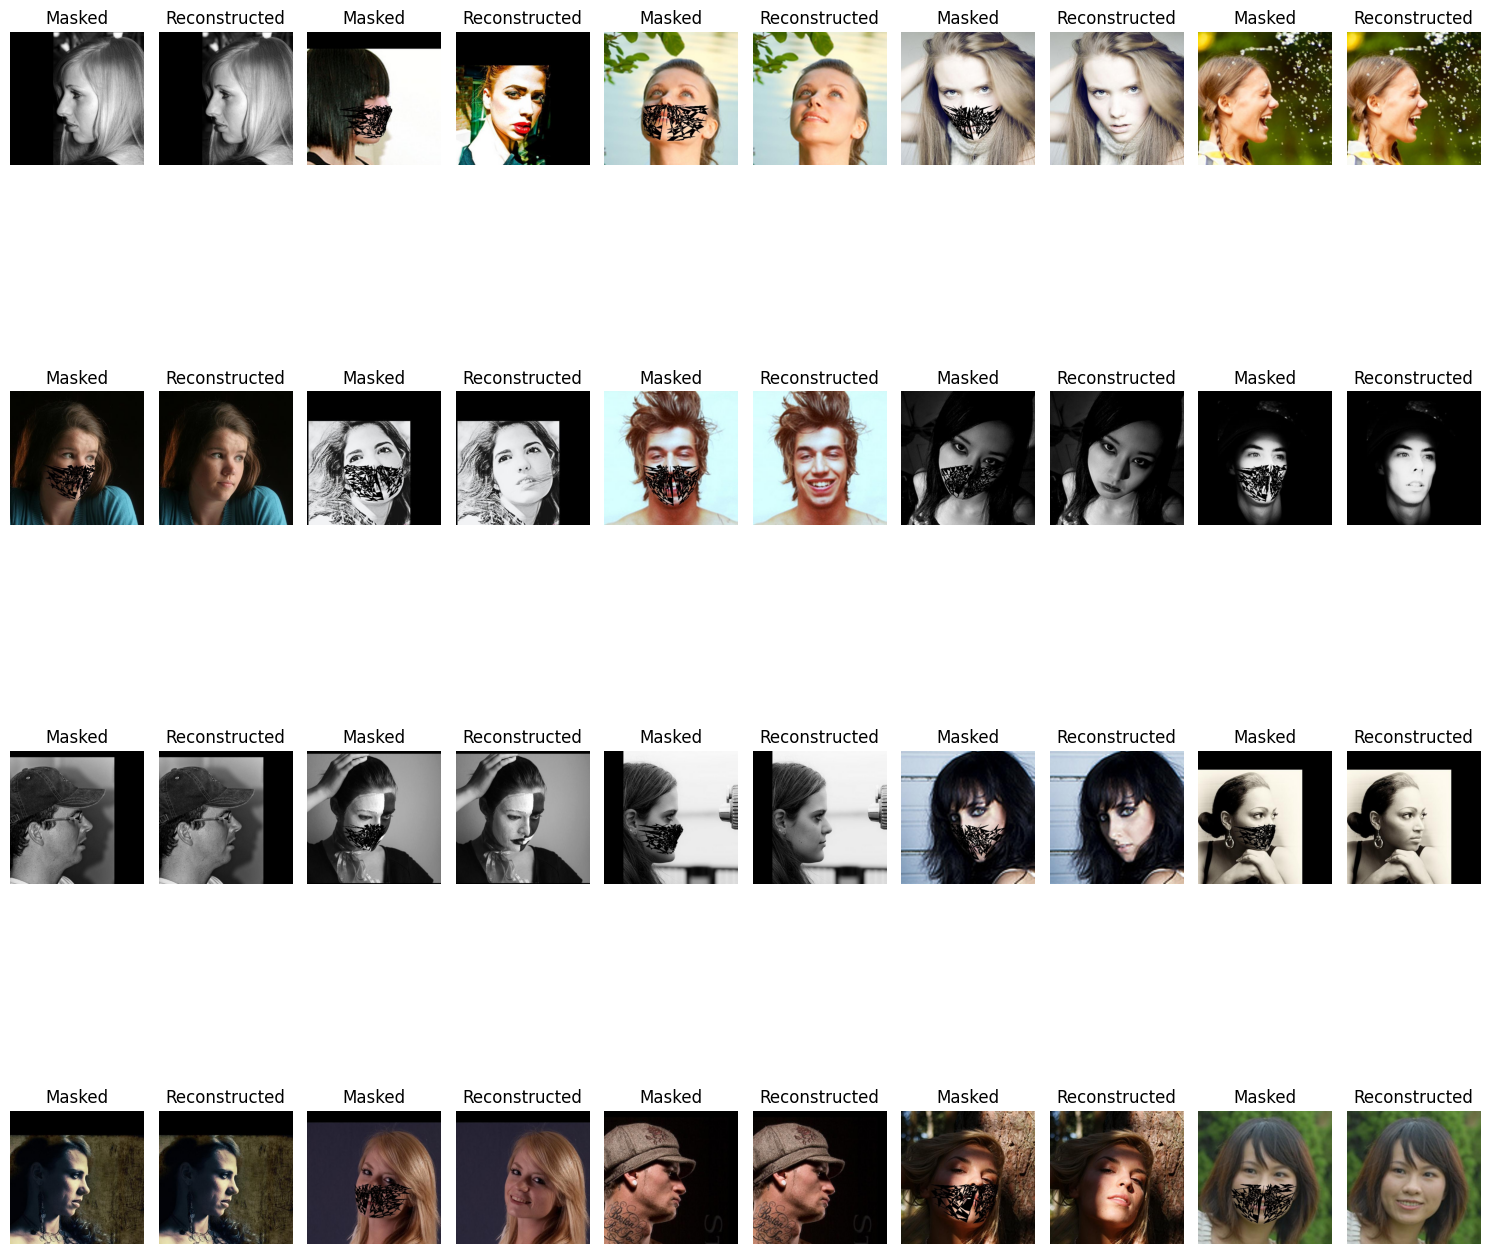

In [ ]:
import matplotlib.pyplot as plt

# Visualize Masked vs Reconstructed Face Pairs
def show_matches(masked, reconstructed, cols=5):
    rows = len(masked) // cols + int(len(masked) % cols != 0)
    plt.figure(figsize=(3 * cols, 4 * rows))
    for i, (m_path, r_path) in enumerate(zip(masked, reconstructed)):
        masked_img = Image.open(m_path).convert("RGB")
        rec_img = Image.open(r_path).convert("RGB")

        plt.subplot(rows, cols * 2, 2 * i + 1)
        plt.imshow(masked_img)
        plt.title("Masked")
        plt.axis("off")

        plt.subplot(rows, cols * 2, 2 * i + 2)
        plt.imshow(rec_img)
        plt.title("Reconstructed")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_matches(masked_paths, reconstructed_paths)